In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [22]:
BTC = yf.download("BTC-USD", start="2018-1-1",end='2022-1-1')['Adj Close']
ETH = yf.download("ETH-USD", start="2018-1-1",end='2022-1-1')['Adj Close']
XRP = yf.download("XRP-USD", start="2018-1-1",end='2022-1-1')['Adj Close']
ADA = yf.download("ADA-USD", start="2018-1-1",end='2022-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
crypto = pd.concat([BTC, ETH, XRP, ADA], axis=1)
crypto.columns = ['BTC', 'ETH', 'XRP', 'ADA']

In [24]:
crypto

,BTC,ETH,XRP,ADA
Date,,,,
2018-01-01,13657.200195,772.640991,2.391030,0.728657
2018-01-02,14982.099609,884.443970,2.480900,0.782587
2018-01-03,15201.000000,962.719971,3.105370,1.079660
2018-01-04,15599.200195,980.921997,3.196630,1.114120
2018-01-05,17429.500000,997.719971,3.048710,0.999559
...,...,...,...,...
2021-12-28,47588.855469,3800.893066,0.852960,1.402264
2021-12-29,46444.710938,3628.531738,0.816714,1.330814
2021-12-30,47178.125000,3713.852051,0.839649,1.360415


In [25]:
crypto/crypto.shift(1)

,BTC,ETH,XRP,ADA
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,1.097011,1.144702,1.037586,1.074013
2018-01-03,1.014611,1.088503,1.251711,1.379604
2018-01-04,1.026196,1.018907,1.029388,1.031917
2018-01-05,1.117333,1.017125,0.953726,0.897174
...,...,...,...,...
2021-12-28,0.939741,0.941387,0.920940,0.926864
2021-12-29,0.975958,0.954652,0.957506,0.949047
2021-12-30,1.015791,1.023514,1.028082,1.022243


In [26]:
log_returns = np.log(crypto/crypto.shift(1)) 

In [27]:
log_returns

,BTC,ETH,XRP,ADA
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,0.092589,0.135145,0.036897,0.071402
2018-01-03,0.014505,0.084803,0.224511,0.321796
2018-01-04,0.025858,0.018730,0.028964,0.031419
2018-01-05,0.110945,0.016980,-0.047379,-0.108506
...,...,...,...,...
2021-12-28,-0.062151,-0.060401,-0.082360,-0.075949
2021-12-29,-0.024336,-0.046408,-0.043424,-0.052297
2021-12-30,0.015668,0.023242,0.027695,0.021999


In [28]:
def random_weights(n):
    
    weights = np.random.random(n)
    
    return weights/np.sum(weights)

In [29]:
weights = random_weights(4)

In [30]:
def weighted_returns(log_returns, weights):
    
    return np.sum(log_returns.mean() * weights) * 252

In [31]:
log_returns_cov = log_returns.cov()
log_returns_cov

,BTC,ETH,XRP,ADA
BTC,0.001619,0.001718,0.001559,0.001729
ETH,0.001718,0.002711,0.002204,0.002457
XRP,0.001559,0.002204,0.003920,0.002548
ADA,0.001729,0.002457,0.002548,0.003755


In [32]:
def volatility(log_returns_cov, weights):
    
    annual_cov = np.dot(log_returns_cov * 252, weights)
    volatility = np.sqrt(np.dot(annual_cov, weights.transpose()))
    
    return volatility

In [33]:
volatility(log_returns_cov, weights)

0.7424434025209176

In [34]:
log_returns = np.log(crypto/crypto.shift(1))
log_returns_cov = log_returns.cov()

In [35]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = random_weights(n=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(weighted_returns(log_returns, weights))
    mc_portfolio_vol.append(volatility(log_returns_cov, weights))

In [36]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

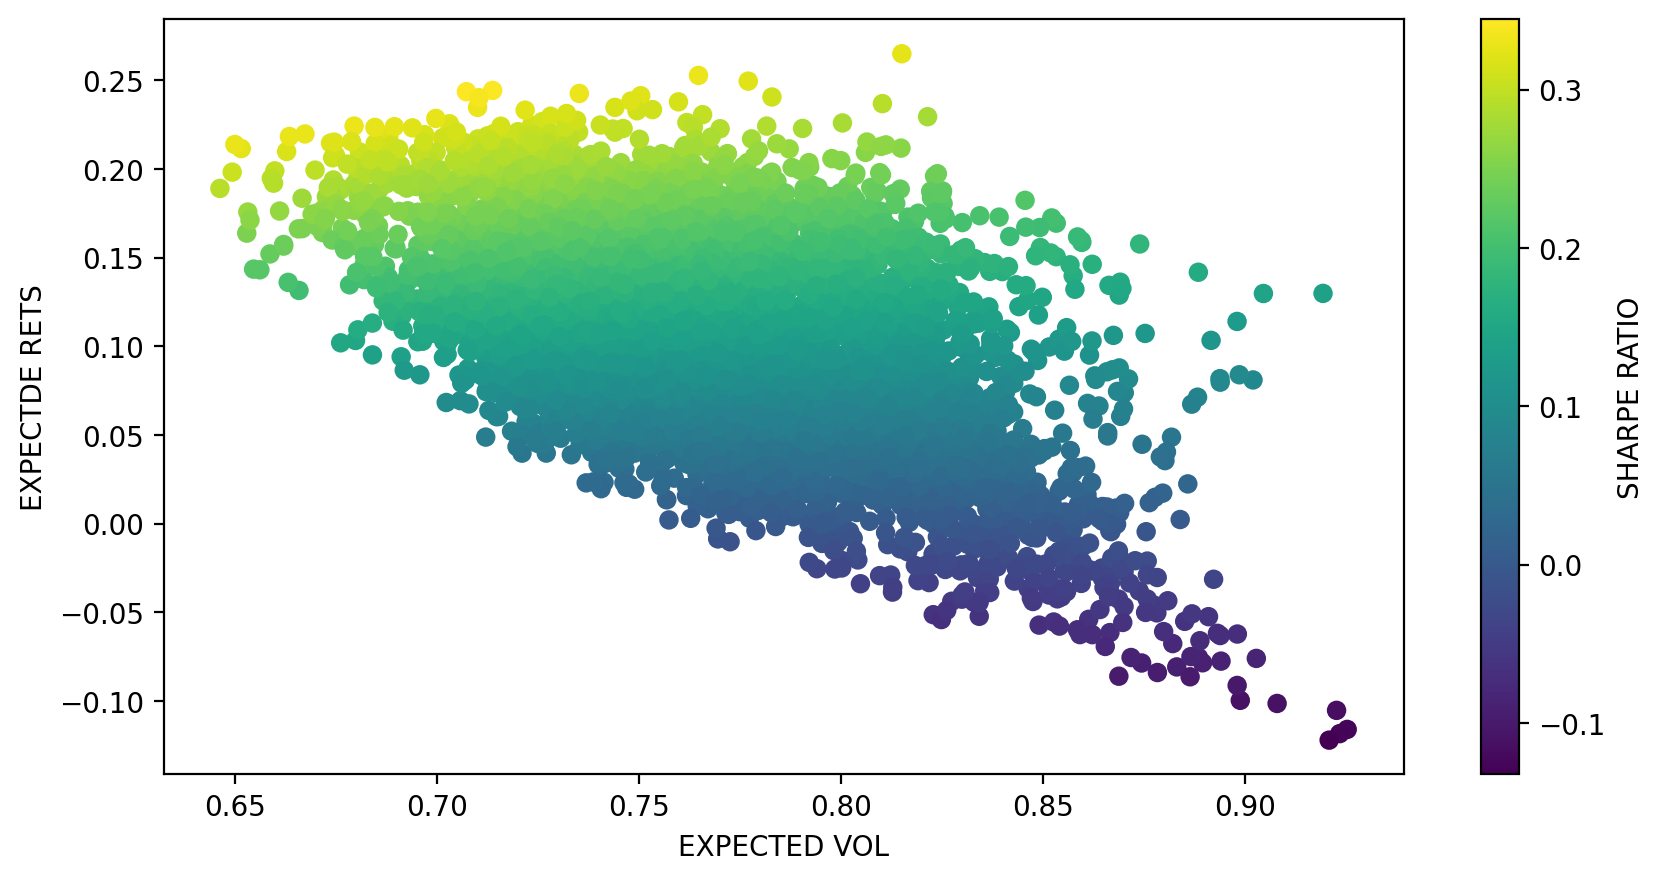

In [37]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [38]:
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.4568586 , 0.5310338 , 0.00489352, 0.00721408])

In [47]:
###code in efficicent frontier

In [48]:
expected_returns_range = np.linspace(-0.2, 0.3, 100)

In [49]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})